In [1]:
import pickle as pkl
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
mm = 'GBR'

In [3]:
with open('./','rb') as f:
    datas = pkl.load(f)

In [4]:
datas = [x['{}_model'.format(mm)].iloc[:,[0,-1]] for x in datas]

In [5]:
true = [data.iloc[:,-1] for data in datas]

In [6]:
true = pd.concat(true, axis=1).iloc[:,:-1]

In [7]:
true

,CYEAR=2000.25,CYEAR=2000.5,CYEAR=2000.75,CYEAR=2001.0,CYEAR=2001.25,CYEAR=2001.5,CYEAR=2001.75,CYEAR=2002.0,CYEAR=2002.25,CYEAR=2002.5,...,CYEAR=2016.5,CYEAR=2016.75,CYEAR=2017.0,CYEAR=2017.25,CYEAR=2017.5,CYEAR=2017.75,CYEAR=2018.0,CYEAR=2018.25,CYEAR=2018.5,CYEAR=2018.75
0,2.369640,1.451506,0.775509,0.240273,0.525184,2.008726,0.381937,0.887576,1.216865,1.263444,...,1.420140,0.912196,1.143991,0.704940,0.840569,0.687071,0.815218,0.667208,0.936592,0.808402
1,0.184661,0.064132,-0.059308,-0.110991,-0.290384,-0.340653,-0.257001,-0.690372,-0.071480,0.077829,...,-0.000832,-0.088976,-0.066489,-0.032357,-0.010786,-0.007958,0.145095,0.000000,0.000000,0.000000
2,1.659512,0.853611,0.500939,0.032683,-0.524229,1.363736,-0.339688,0.632468,0.858799,0.641864,...,1.031191,0.556575,0.650669,0.533855,0.646001,0.272633,0.541562,0.456979,0.766150,0.559946
3,-0.061483,-1.220400,-0.821404,-0.460929,-0.632386,-0.273797,0.320497,0.388934,-0.071767,-0.020118,...,-0.827949,-0.504803,-0.252200,-0.873957,-0.936632,-0.953234,0.350846,0.214036,0.244482,0.314063


In [8]:
pred = [data.iloc[:,0] for data in datas]

In [9]:
pred = pd.concat(pred, axis=1).iloc[:,:-2]

In [10]:
pred

,2000.5,2000.75,2001.0,2001.25,2001.5,2001.75,2002.0,2002.25,2002.5,2002.75,...,2016.5,2016.75,2017.0,2017.25,2017.5,2017.75,2018.0,2018.25,2018.5,2018.75
0,1.470080,1.679613,1.352106,1.090898,1.206211,1.539982,0.943453,1.148808,1.264857,1.218244,...,0.919915,1.174040,0.996205,0.948195,1.174140,0.980316,1.056999,0.750513,0.766892,0.907324
1,-0.126513,0.143136,0.187845,-0.048009,-0.101752,-0.023355,-0.082476,-0.319403,-0.254929,-0.227894,...,-0.051342,-0.031629,-0.061335,-0.039343,-0.017586,-0.028493,0.146470,-0.092426,-0.226070,-0.151441
2,1.066369,0.878322,0.840220,0.580019,0.410851,0.906184,0.168905,0.513437,0.749285,0.690344,...,0.531680,0.666583,0.544527,0.551921,0.613568,0.634616,0.592957,0.551673,0.495958,0.537633
3,-0.305406,-0.817555,-0.557791,-0.140867,-0.517022,-0.537813,-0.042566,0.056691,-0.173416,-0.171401,...,-0.263580,-0.452559,-0.420381,-0.404540,-0.513974,-0.474573,-0.744782,-0.088353,0.004731,0.038664


In [11]:
rw_pred_std = np.std(true.values[:,1:] - true.values[:,:-1], axis=1)

In [12]:
rw_pred_std

array([0.93893305, 0.30423108, 0.87150164, 0.8080987 ])

In [13]:
pred_std = np.std(true.values[:,1:] - pred.values, axis=1)

In [14]:
pred_std

array([0.72088812, 0.31753549, 0.66072438, 0.70659989])

In [15]:
from statsmodels.tsa.api import VAR, DynamicVAR

/home/nikita/.virtualenvs/py3.6_gpu/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [16]:
data = pd.read_csv('../CDATA/{}.csv'.format(mm), index_col='VARIABLE')

In [17]:
data.columns = data.columns.astype('float32')

In [18]:
years = [x for x in pred.columns if x > 2000]

In [19]:
min(years), max(years)

(2000.5, 2018.75)

In [20]:
forecast = []
for year in years:
    yd = data.loc[:,data.columns<=year]
    yd = data.loc[:,yd.columns >= year-10]
    model = VAR(yd.values.T)
    results = model.fit()
    fc = results.forecast(yd.values.T, 1)[0]
    forecast.append(fc)
forecast = np.array(forecast)[:-1]

/home/nikita/.virtualenvs/py3.6_gpu/lib/python3.6/site-packages/statsmodels/tsa/vector_ar/var_model.py:461: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  params = np.linalg.lstsq(z, y_sample)[0]


In [21]:
true_vals = data.loc[:,years[1:]].values.T

In [22]:
forecast.shape, true_vals.shape

((73, 4), (73, 4))

In [23]:
np.std(forecast-true_vals, axis=0)/np.std((true_vals[1:]-true_vals[:-1])[:len(forecast)], axis=0)

array([0.79904748, 1.01394326, 0.69919747, 0.9233598 ])

In [24]:
pred_std/rw_pred_std

array([0.76777373, 1.04373127, 0.75814473, 0.87439801])

In [25]:
np.mean(forecast-true_vals, axis=0)/np.std((true_vals[1:]-true_vals[:-1])[:len(forecast)], axis=0)

array([ 0.07179551, -0.02531475, -0.02836306, -0.32389664])

In [26]:
np.mean(true.values[:,1:] - pred.values, axis=1)/rw_pred_std

array([-0.19125634,  0.27257217, -0.04485597,  0.04729825])

In [27]:
rw_pred_std

array([0.83642454, 0.40445279, 0.78413652, 0.92916721])

In [1]:
import tensorflow as tf
from flows import NormalRW, DFlow, NVPFlow, LogNormal, GVAR, phase,Normal, floatX, MVNormal, MVNormalRW, Linear, LinearChol
from flows.models import VARmodel
import flows

import numpy as np
import pandas as pd
from tensorflow.contrib.distributions import WishartCholesky
import math
from tqdm import tqdm
import pickle as pkl

VAR_DIM = 4


global_inf = DFlow([NVPFlow(dim=(VAR_DIM*2+1)*VAR_DIM, name='flow_{}'.format(i)) for i in range(6)], init_sigma=0.08)
global_prior = Normal(None, sigma=.3).logdens(global_inf.output)
tf.add_to_collection('priors', global_prior)
tf.add_to_collection('logdensities', global_inf.logdens)



with tf.variable_scope('variation_rate', dtype=floatX):
    variation_prerate = tf.get_variable('prerate',trainable=False, initializer=math.log(0.3))
    variation_rate = tf.exp(variation_prerate)
    variation = variation_rate#variation_d.sample()

    variation = tf.cast(variation, floatX)
    
    tf.summary.scalar('variation', variation)

individ_variation_prior = Normal((VAR_DIM*2+1)*VAR_DIM, sigma=variation, mu=global_inf.output[0])

models = []
indiv_logdens = []
indiv_priors = []
indivs = {}

with tf.variable_scope(tf.get_variable_scope(), dtype=floatX, reuse=tf.AUTO_REUSE):
    for country in ['AUS','GBR','FRA']:
        with tf.variable_scope(country):
            individ_variation = DFlow([NVPFlow((VAR_DIM*2+1)*VAR_DIM, 
                                               name='nvp_{}'.format(i), 
                                               aux_vars=global_inf.output) for i in range(6)], init_sigma=0.01)

            ind = individ_variation.output[0]
            indivs[country] = ind
    
saver = tf.train.Saver()

Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
sess = tf.InteractiveSession()

In [3]:
saver.restore(sess, '/home/nikita/tmp/gvar_save')

INFO:tensorflow:Restoring parameters from /home/nikita/tmp/gvar_save


In [4]:
indivs

{'AUS': <tf.Tensor 'AUS/strided_slice:0' shape=(36,) dtype=float64>,
 'FRA': <tf.Tensor 'FRA/strided_slice:0' shape=(36,) dtype=float64>,
 'GBR': <tf.Tensor 'GBR/strided_slice:0' shape=(36,) dtype=float64>}

In [5]:
gi = global_inf.output[0]

In [6]:
post = []
for _ in range(4000):
    post.append(indivs['GBR'].eval())

In [7]:
post = np.array(post)

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt

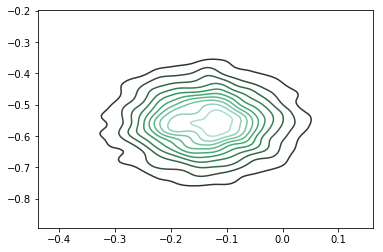

In [10]:
sns.kdeplot(post[:,10],post[:,-2])
plt.show()

In [11]:
np.mean(post, axis=0)

array([ 0.1234352 ,  0.05440993,  0.07546286, -0.09812307, -0.4926919 ,
        0.08766862,  0.1040237 , -0.21993177,  0.49576977, -0.06701268,
       -0.13854845,  0.07872439,  0.07009993,  0.08149226, -0.67749245,
        0.09420848, -0.06961612, -0.17057075,  0.00135235, -0.02374547,
        0.10028396,  0.20502153,  0.00262844, -0.04962745, -0.61399851,
        0.12724653,  0.19321798, -0.02421182, -0.0777595 , -0.03063257,
        0.04558426, -0.03753896, -0.11787274,  0.08232951, -0.4946711 ,
        0.14691354])

In [12]:
np.std(post, axis=0)

array([0.15200107, 0.15723732, 0.1543145 , 0.15098003, 0.1565619 ,
       0.1508831 , 0.14823746, 0.15302687, 0.14954049, 0.15511117,
       0.15277139, 0.14164341, 0.14980194, 0.15391319, 0.15486174,
       0.15467602, 0.15542588, 0.15735737, 0.15647566, 0.15114434,
       0.15390805, 0.15297313, 0.15805968, 0.15747916, 0.1561676 ,
       0.15825775, 0.14866528, 0.14499842, 0.15288236, 0.15320523,
       0.14813876, 0.15628772, 0.14828984, 0.15205224, 0.15257866,
       0.15585343])

In [27]:
lns = np.exp(np.random.normal(-np.log(0.01), .8, size=2000))

In [28]:
tg = 1/lns

In [29]:
np.mean(tg), np.std(tg)

(0.013825768737978507, 0.013106670510527382)

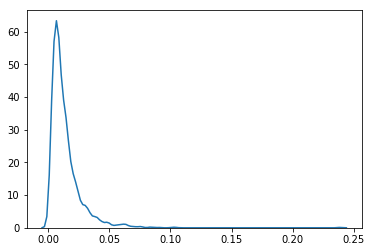

In [30]:
sns.kdeplot(tg)
plt.show()